In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
import sys
import os

# Путь к папке с твоими модулями
src_path = r"D:\Users\Greta\Documents\Учеба\PythonProject\Winstars\Test2\src"
sys.path.append(src_path)

from ner_inference import extract_animals
from cv_inference import classify_image


D:\Users\Greta\Documents\Учеба\PythonProject\Winstars\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Users\Greta\Documents\Учеба\PythonProject\Winstars\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# Путь к папке с изображениями
data_dir = r"D:\Users\Greta\Documents\Учеба\PythonProject\Winstars\Test2\data\images"

# Список классов (названия папок)
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("Классы животных:", classes)


Классы животных: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


           num_images
butterfly         108
cat               108
chicken           108
cow               108
dog               108
elephant          108
horse             108
sheep             108
spider            108
squirrel          108


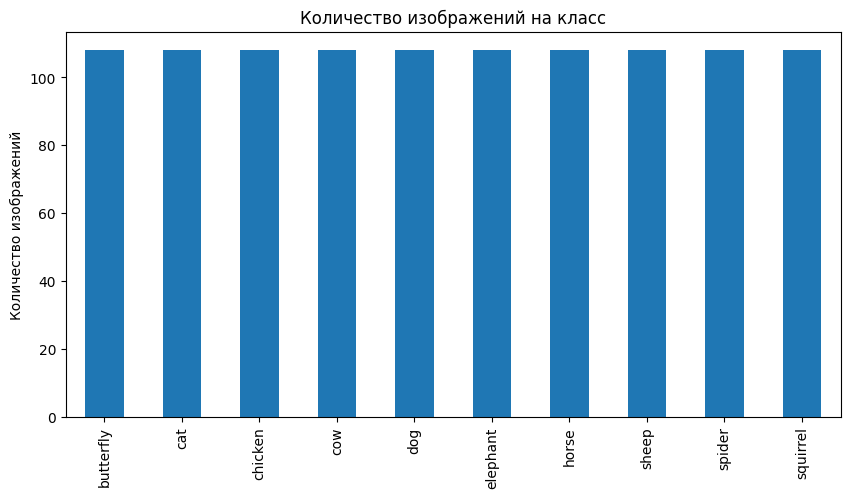

In [4]:
# Подсчёт количества изображений в каждой категории
counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['num_images'])
df_counts = df_counts.sort_values(by='num_images', ascending=False)
print(df_counts)

# График распределения
df_counts.plot(kind='bar', legend=False, figsize=(10,5), title="Количество изображений на класс")
plt.ylabel("Количество изображений")
plt.show()


In [5]:
for cls in classes:
    folder_path = os.path.join(data_dir, cls)
    img_file = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_file)
    print(f"Класс: {cls}, изображение: {img_file}")
    Image.open(img_path).show()


Класс: butterfly, изображение: ea35b2062bf5033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
Класс: cat, изображение: 135.jpeg
Класс: chicken, изображение: 226.jpeg
Класс: cow, изображение: OIP-1d5aHAvQyKwZgJ1p5Jx1rwHaGc.jpeg
Класс: dog, изображение: OIP-_3S-iEDMQnko7ZHgq_FTcwHaEL.jpeg
Класс: elephant, изображение: ea34b40e2bf5003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
Класс: horse, изображение: OIP-0CIUm0J7T6rnAupRmV4ijgHaFj.jpeg
Класс: sheep, изображение: ea35b30c2df6013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
Класс: spider, изображение: e834b70e2efc063ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
Класс: squirrel, изображение: OIP-_QADUIj-ZwXUHDnTkLUivwHaJ_.jpeg


             Width       Height
count  1080.000000  1080.000000
mean    422.332407   315.495370
std     174.493207   117.650635
min     107.000000    75.000000
25%     300.000000   222.000000
50%     300.000000   300.000000
75%     640.000000   426.000000
max     640.000000   640.000000


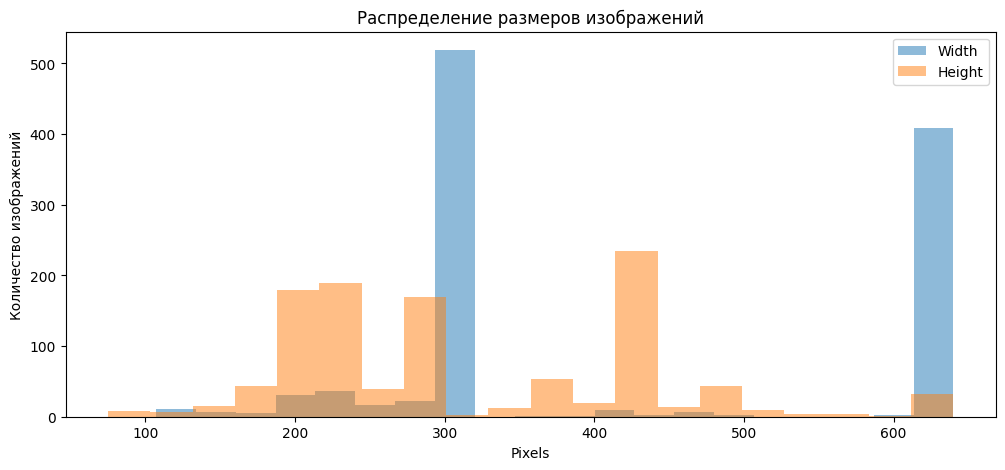

In [6]:
sizes = []
for cls in classes:
    folder_path = os.path.join(data_dir, cls)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        sizes.append(img.size)  # (width, height)

# Преобразуем в DataFrame
df_sizes = pd.DataFrame(sizes, columns=["Width", "Height"])
print(df_sizes.describe())

# Гистограммы
plt.figure(figsize=(12,5))
plt.hist(df_sizes["Width"], bins=20, alpha=0.5, label="Width")
plt.hist(df_sizes["Height"], bins=20, alpha=0.5, label="Height")
plt.xlabel("Pixels")
plt.ylabel("Количество изображений")
plt.title("Распределение размеров изображений")
plt.legend()
plt.show()


In [7]:
# Пример случайного класса
cls = random.choice(classes)
folder_path = os.path.join(data_dir, cls)
img_file = random.choice(os.listdir(folder_path))
img_path = os.path.join(folder_path, img_file)

# Отобразим изображение
Image.open(img_path).show()
print(f"Текстовое описание: There is a {cls} in the picture")


Текстовое описание: There is a cat in the picture


In [8]:
# Проверка извлечения животных из текста
from ner_inference import extract_animals

sample_text = f"There is a {cls} in the picture"
animals_extracted = extract_animals(sample_text)
print("Извлечено животных из текста:", animals_extracted)


Извлечено животных из текста: ['cat']


In [9]:
print("✅ Итоги анализа данных:")
print(f"Всего классов: {len(classes)}")
print(f"Общее количество изображений: {df_counts['num_images'].sum()}")
print("Минимальное/максимальное количество изображений на класс:")
print(df_counts[['num_images']].describe())
print("Размеры изображений:")
print(df_sizes.describe())


✅ Итоги анализа данных:
Всего классов: 10
Общее количество изображений: 1080
Минимальное/максимальное количество изображений на класс:
       num_images
count        10.0
mean        108.0
std           0.0
min         108.0
25%         108.0
50%         108.0
75%         108.0
max         108.0
Размеры изображений:
             Width       Height
count  1080.000000  1080.000000
mean    422.332407   315.495370
std     174.493207   117.650635
min     107.000000    75.000000
25%     300.000000   222.000000
50%     300.000000   300.000000
75%     640.000000   426.000000
max     640.000000   640.000000
